<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/17324_normal_OD_cup_vs_large_OD_cup_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np


In [2]:
os.listdir('/content/drive/MyDrive/optic cup images/split')

['train', 'val', 'test']

In [3]:
os.listdir('/content/drive/MyDrive/optic cup images/split/train'),os.listdir('/content/drive/MyDrive/optic cup images/split/val'),os.listdir('/content/drive/MyDrive/optic cup images/split/test')

(['normal cup', 'large cup'],
 ['normal cup', 'large cup'],
 ['normal cup', 'large cup'])

In [4]:
trainnormalcup = os.listdir('/content/drive/MyDrive/optic cup images/split/train/normal cup')
trainnormalcup
print(len(trainnormalcup))

30


In [5]:
trainlargecup = os.listdir('/content/drive/MyDrive/optic cup images/split/train/large cup')
trainlargecup
print(len(trainlargecup))

40


In [6]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

In [7]:
trainimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/train',
                                          target_size=(224,224))

validationimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/val',
                                          target_size=(224,224))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/optic cup images/split/test',
                                          target_size=(224,224))

Found 70 images belonging to 2 classes.
Found 8 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [8]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               weights= "imagenet",
                               input_shape=(224,224,3))
VGG.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
from keras.models import Sequential

model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21203778 (80.89 MB)
Trainable params: 6489090 (24.75 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [34]:
model.fit(trainimages,
          batch_size=10,
          epochs=5,
          validation_data=validationimages)
model.save('normalcupvslargecup_model.keras')

Epoch 1/5
3/3 [==============================] - 53s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.1340 - val_accuracy: 0.8750
Epoch 2/5
3/3 [==============================] - 57s 17s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.2452 - val_accuracy: 0.8750
Epoch 3/5
3/3 [==============================] - 53s 23s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3279 - val_accuracy: 0.8750
Epoch 4/5
3/3 [==============================] - 71s 31s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.3895 - val_accuracy: 0.8750
Epoch 5/5
3/3 [==============================] - 60s 26s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1.4352 - val_accuracy: 0.8750


In [35]:
y_pred = model.predict(testimages)
y_pred

1/1 [==============================] - 6s 6s/step


array([[1.5716388e-28, 9.9999994e-01],
       [9.9999994e-01, 6.7876161e-23],
       [9.9999994e-01, 0.0000000e+00],
       [9.9999994e-01, 4.3740345e-21],
       [7.0931122e-10, 9.9999994e-01],
       [9.9999994e-01, 0.0000000e+00],
       [9.9618942e-01, 3.8106295e-03],
       [0.0000000e+00, 9.9999994e-01],
       [9.9922156e-01, 7.7837444e-04],
       [1.0000000e+00, 5.1074664e-14]], dtype=float32)

In [36]:
y_pred1 = np.argmax(y_pred,axis=1)
y_pred1

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [20]:
y_true=testimages.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [14]:
testimages.class_indices

{'large cup': 0, 'normal cup': 1}

In [37]:
from sklearn import metrics
metrics.confusion_matrix(y_true,y_pred1)

array([[3, 2],
       [4, 1]])

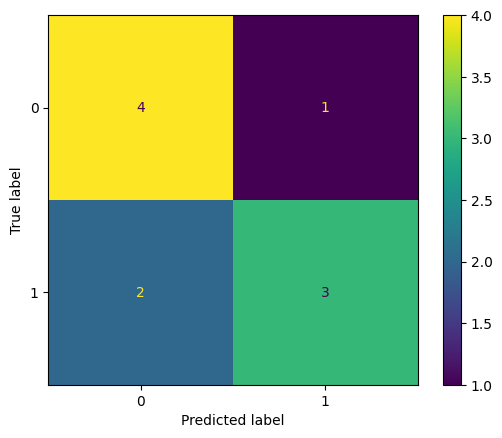

In [91]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true,y_pred1)

In [78]:
print(metrics.classification_report(y_true,y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.75      0.60      0.67         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



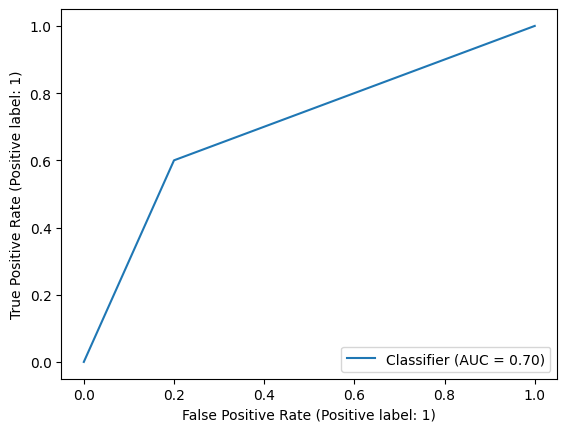

In [79]:
metrics.RocCurveDisplay.from_predictions(y_true,y_pred1)

1/1 [==============================] - 1s 1s/step
Prediction: large cup


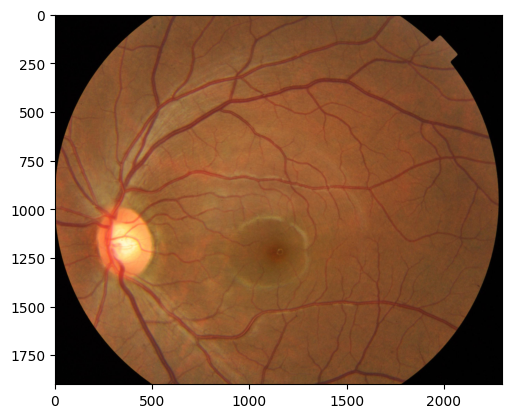

In [39]:
from keras.preprocessing import image
from keras.models import load_model

# Load the trained CNN model
model = load_model('/content/normalcupvslargecup_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["large cup", "normal cup", ]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/optic cup images/large cup/1ffa9498-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/optic cup images/large cup/1ffa9498-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 1s 1s/step
Prediction: large cup


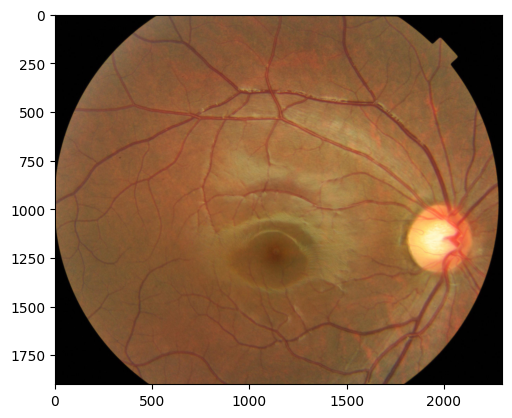

In [41]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/optic cup images/large cup/1ffa94a2-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/optic cup images/large cup/1ffa94a2-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


1/1 [==============================] - 1s 797ms/step
Prediction: normal cup


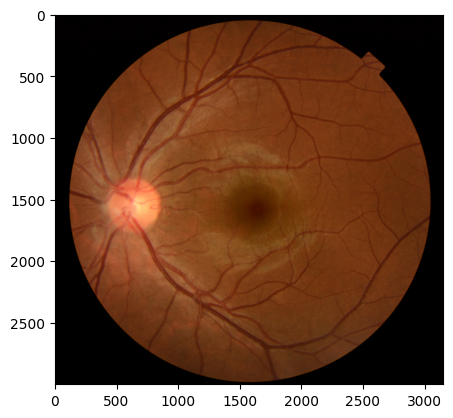

In [43]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/optic cup images/normal cup/1ffa9641-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/optic cup images/normal cup/1ffa9641-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)


In [ ]:
# Example usage:
# unknown_image_path = ""  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('')
plt.imshow(testimage)


1/1 [==============================] - 1s 814ms/step
Prediction: normal cup


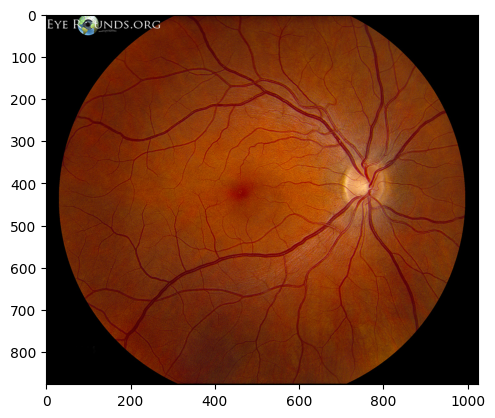

In [45]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/Normal-fundus-LRG (1).jpg"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/Normal-fundus-LRG (1).jpg')
plt.imshow(testimage)
